In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
phldata = pd.read_csv("cleandata.csv")
#Dropping unnecessary columns for ease of Machine Learning algorithms
phldata=phldata.drop(columns=['P_NAME','S_NAME','P_TYPE','P_TYPE_TEMP','S_TYPE_TEMP'])
phldata.info(verbose=True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026 entries, 0 to 2025
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   P_PERIOD               2026 non-null   float64
 1   S_DEC                  2026 non-null   float64
 2   S_MAG                  2026 non-null   float64
 3   S_MASS                 2026 non-null   float64
 4   S_TEMPERATURE          2026 non-null   float64
 5   P_DISTANCE             2026 non-null   float64
 6   P_FLUX                 2026 non-null   float64
 7   P_TEMP_EQUIL           2026 non-null   float64
 8   S_RADIUS_EST           2026 non-null   float64
 9   S_LUMINOSITY           2026 non-null   float64
 10  P_HABITABLE            2026 non-null   int64  
 11  P_ESI                  2026 non-null   float64
 12  P_RADIUS_EST           2026 non-null   float64
 13  P_MASS_EST             2026 non-null   float64
 14  P_SEMI_MAJOR_AXIS_EST  2026 non-null   float64
dtypes: f

In [3]:
# Putting feature variable to X
X = phldata.drop('P_HABITABLE',axis=1)
# Putting response variable to y
y = phldata['P_HABITABLE']

In [4]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((1418, 14), (608, 14))

Random Forest Classifier

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
#initializing classifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [7]:
%%time
classifier_rf.fit(X_train, y_train)

Wall time: 288 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [8]:
#Calculate OOB(the number of correctly predicted rows from the out of bag sample.)
classifier_rf.oob_score_

0.9915373765867419

In [9]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [12]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
Wall time: 39.8 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [13]:
grid_search.best_score_

0.9936540144823744

In [14]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=3, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

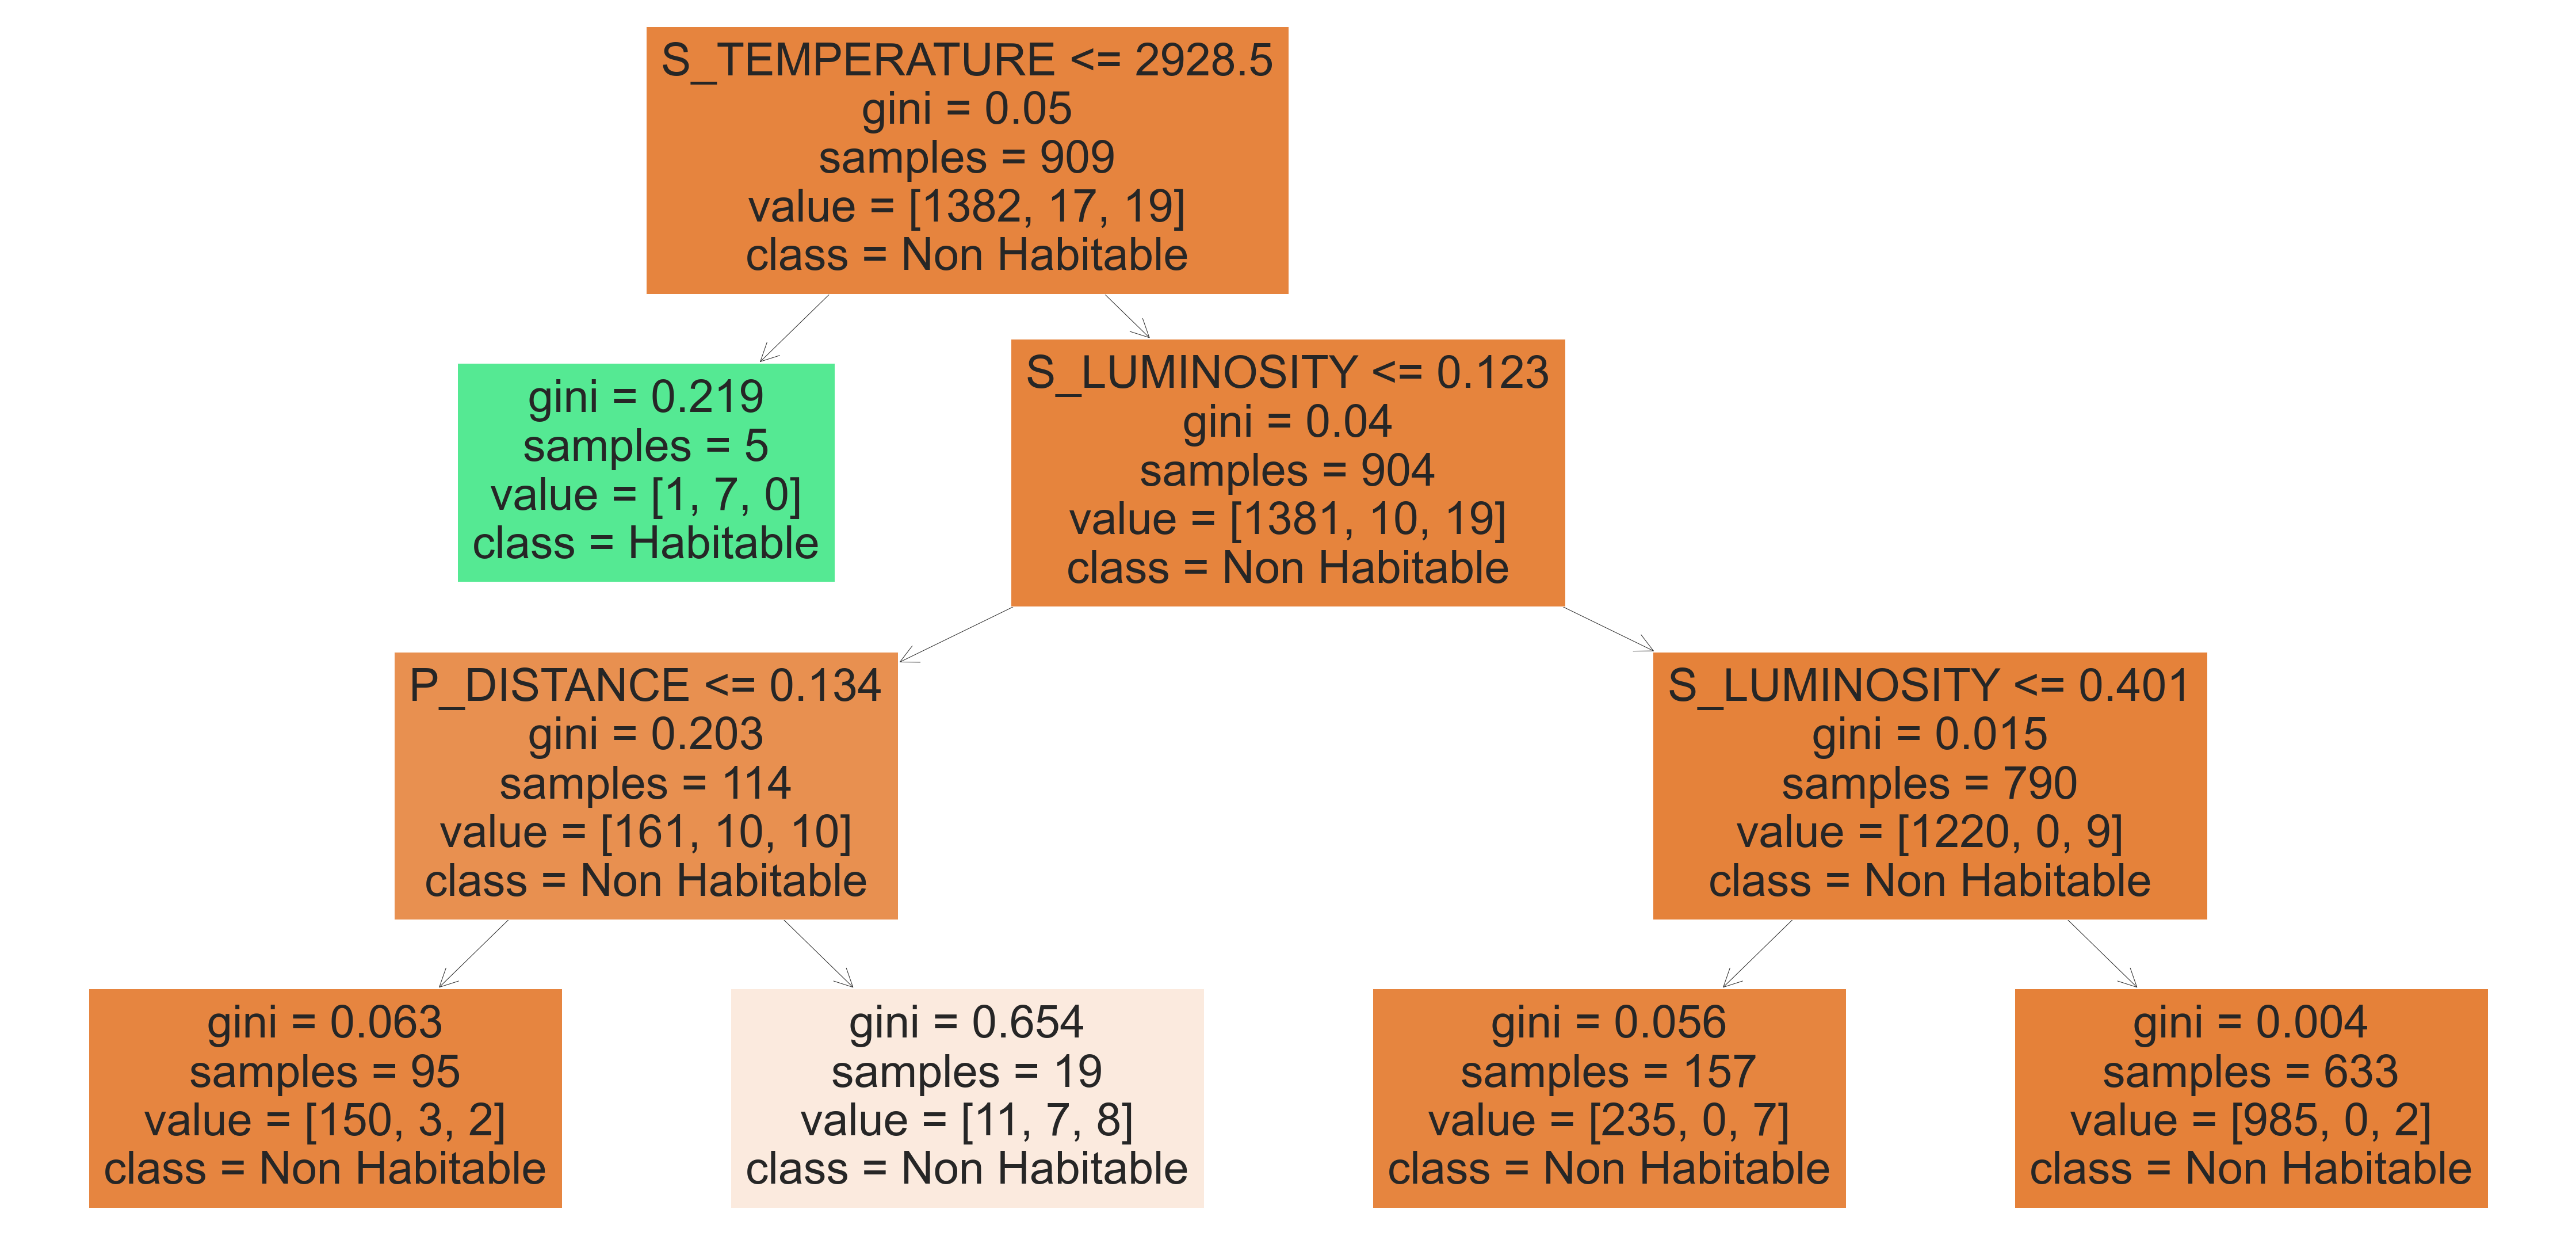

In [15]:
#Plotting the decision tree for RF classifier
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[2], feature_names = X.columns,class_names=['Non Habitable', "Habitable"],filled=True);

<AxesSubplot:>

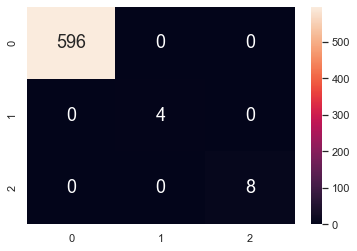

In [31]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

rf.fit(X_train, y_train);
pred = rf.predict(X_test)

sb.heatmap(confusion_matrix(y_test, pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [16]:
#Sorting data with the help of feature importance
rf_best.feature_importances_

array([0.0340396 , 0.00295618, 0.00327778, 0.03774592, 0.03943895,
       0.02236586, 0.1553797 , 0.18271529, 0.04401619, 0.05121725,
       0.2798591 , 0.07774063, 0.05608353, 0.01316402])

In [17]:
imp_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf_best.feature_importances_
})
imp_df.sort_values(by="Importance", ascending=False)

,Feature,Importance
10,P_ESI,0.279859
7,P_TEMP_EQUIL,0.182715
6,P_FLUX,0.155380
11,P_RADIUS_EST,0.077741
12,P_MASS_EST,0.056084
9,S_LUMINOSITY,0.051217
8,S_RADIUS_EST,0.044016
4,S_TEMPERATURE,0.039439
3,S_MASS,0.037746
0,P_PERIOD,0.034040


Gradient Boosting Classifier (GBM)

In [18]:
#GBM
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [19]:
model = GradientBoostingClassifier(n_estimators=100,max_depth=5)

In [20]:
model.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5)

In [21]:
predict_train = model.predict(X_train)
print('\nTarget on train data',predict_train) 


Target on train data [0 0 0 ... 0 0 0]


In [22]:
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)


accuracy_score on train dataset :  1.0


In [23]:
predict_test = model.predict(X_test)
print('\nTarget on test data',predict_test) 



Target on test data [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0

In [24]:
accuracy_test = accuracy_score(y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)


accuracy_score on test dataset :  0.9901315789473685


In [ ]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")